Lending Club Case Study

In [171]:
# Importing all the necessary library for processing the data 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings due to version problems
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)

# Read the input file 'loan.csv' which contains the data for all the consumers who have applied for loan and where loan is approved
df1 = pd.read_csv('loan.csv')

# Find out how many rows & columns are there in the dataset by using the shape command
print(df1.shape)
# --> here are 39717 rows & 111 columns in loan.csv file
#print(df.dtypes)

(39717, 111)


In [172]:
# Now, using the describe function, lets get the statistics on each numerical column
print(df1.describe())
# --> The outcome of describe function shows that there are columns which have no values & hence, are redundant columns and
# should be dropped from the file

                 id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%   

In [173]:
# 
df1.info()
df1.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


(39717, 111)

In [174]:
# Count the number of missing values in each column of the dataset
df1.isna().sum()

# This shows that there are several empty columns in the dataset

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [175]:
# Counting the number of rows have all missing values
print('Number of empty Rows:')
print(df1.isnull().all(axis=1).sum())
# --> There are no empty rows in whole dataset.

# Counting the number of columns have all missing values
print('Number of empty Columns:')
print(df1.isnull().all(axis=0).sum())

# --> There are several empty columns in whole dataset.

Number of empty Rows:
0
Number of empty Columns:
54


In [178]:
# to delete the columns which contains all zero values 
df1 = df1.dropna(axis=1, how='all')

In [179]:
df1.shape

(39717, 57)

In [180]:
df1.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths  ...    recoveries  \
count  39717.000000    39717.000000  ...  39717.000000   
mean       0.146512        0.869200  ...     95.221624   
std        0.491812        1.070219  ...    688.744771   
min        0.000000        0.000000  ...      0.000000   
25%        0.000000        0.000000  ...      0.000000   
50%        0.000000        1.000000  ...      0.000000   
75%        0.000000        1.000000  ...      0.000000   
max       11.000000        8.000000  ...  29623.350000   

       collection_recovery_fee  last_pymnt_amnt  collections_12_mths_ex_med  \
count             39717.000000     39717.000000                     39661.0   
mean                 12.406112      2678.826162                         0.0   
std                 148.671593      4447.136012                         0.0   
min                   0.000000         0.000000                         0.0   
25%                   0.000000       218.680000                         0.0   
50%                   0.000000       546.140000                         0.0   
75%                   0.000000      3293.160000                         0.0   
max                7002.190000     36115.200000                         0.0   

       policy_code  acc_now_delinq  chargeoff_within_12_mths  delinq_amnt  \
count      39717.0         39717.0                   39661.0      39717.0   
mean           1.0             0.0                       0.0          0.0   
std            0.0             0.0                       0.0          0.0   
min            1.0             0.0                       0.0          0.0   
25%            1.0             0.0                       0.0          0.0   
50%            1.0             0.0                       0.0          0.0   
75%            1.0             0.0                       0.0          0.0   
max            1.0             0.0                       0.0          0.0   

       pub_rec_bankruptcies  tax_liens  
count          39020.000000    39678.0  
mean               0.043260        0.0  
std                0.204324        0.0  
min                0.000000        0.0  
25%                0.000000        0.0  
50%                0.000000        0.0  
75%                0.000000        0.0  
max                2.000000        0.0  

[8 rows x 33 columns]

In [181]:
df1.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [182]:
# Finding the columns having large % of missing values
df1.isnull().mean()

#--> emp_title,mths_since_last_delinq,mths_since_last_record,next_pymnt_d contains more than 60% of missing values 

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     0.061913
emp_length                    0.027066
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
desc                          0.325805
purpose                       0.000000
title                         0.000277
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs              

In [183]:
#Dropping emp_title,mths_since_last_delinq,mths_since_last_record,next_pymnt_d from the dataset
df1 = df1.drop(['next_pymnt_d', 'mths_since_last_record','mths_since_last_delinq','emp_title'], axis='columns')
df1.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... last_pymnt_amnt  \
0   10.65%       162.87     B        B2  ...          171.62   
1   15.27%        59.83     C        C4  ...          119.66   
2   15.96%        84.33     C        C5  ...          649.91   
3   13.49%       339.31     C        C1  ...          357.48   
4   12.69%        67.79     B        B5  ...           67.79   

  last_credit_pull_d  collections_12_mths_ex_med policy_code application_type  \
0             May-16                         0.0           1       INDIVIDUAL   
1             Sep-13                         0.0           1       INDIVIDUAL   
2             May-16                         0.0           1       INDIVIDUAL   
3             Apr-16                         0.0           1       INDIVIDUAL   
4             May-16                         0.0           1       INDIVIDUAL   

  acc_now_delinq chargeoff_within_12_mths delinq_amnt pub_rec_bankruptcies  \
0              0                      0.0           0                  0.0   
1              0                      0.0           0                  0.0   
2              0                      0.0           0                  0.0   
3              0                      0.0           0                  0.0   
4              0                      0.0           0                  0.0   

  tax_liens  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  

[5 rows x 53 columns]

In [184]:
df1.shape

(39717, 53)

In [145]:
#df2 = df1[df1.columns[df1.isnull().any()]]
#print(df2)

In [185]:
df1.isnull().mean()

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_length                    0.027066
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
desc                          0.325805
purpose                       0.000000
title                         0.000277
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

In [186]:
# Getting the columns where the value is 0 for all the rows
df2= df1.loc[: , (df1 == 0).all()]
df2
#--> acc_now_delinq & delinq_amnt contains all zeroes & can be removed from the dataset

acc_now_delinq  delinq_amnt
0                   0            0
1                   0            0
2                   0            0
3                   0            0
4                   0            0
5                   0            0
6                   0            0
7                   0            0
8                   0            0
9                   0            0
10                  0            0
11                  0            0
12                  0            0
13                  0            0
14                  0            0
15                  0            0
16                  0            0
17                  0            0
18                  0            0
19                  0            0
20                  0            0
21                  0            0
22                  0            0
23                  0            0
24                  0            0
25                  0            0
26                  0            0
27                  0            0
28                  0            0
29                  0            0
30                  0            0
31                  0            0
32                  0            0
33                  0            0
34                  0            0
35                  0            0
36                  0            0
37                  0            0
38                  0            0
39                  0            0
40                  0            0
41                  0            0
42                  0            0
43                  0            0
44                  0            0
45                  0            0
46                  0            0
47                  0            0
48                  0            0
49                  0            0
50                  0            0
51                  0            0
52                  0            0
53                  0            0
54                  0            0
55                  0            0
56                  0            0
57                  0            0
58                  0            0
59                  0            0
60                  0            0
61                  0            0
62                  0            0
63                  0            0
64                  0            0
65                  0            0
66                  0            0
67                  0            0
68                  0            0
69                  0            0
70                  0            0
71                  0            0
72                  0            0
73                  0            0
74                  0            0
75                  0            0
76                  0            0
77                  0            0
78                  0            0
79                  0            0
80                  0            0
81                  0            0
82                  0            0
83                  0            0
84                  0            0
85                  0            0
86                  0            0
87                  0            0
88                  0            0
89                  0            0
90                  0            0
91                  0            0
92                  0            0
93                  0            0
94                  0            0
95                  0            0
96                  0            0
97                  0            0
98                  0            0
99                  0            0
100                 0            0
101                 0            0
102                 0            0
103                 0            0
104                 0            0
105                 0            0
106                 0            0
107                 0            0
108                 0            0
109                 0            0
110                 0            0
111                 0            0
112                 0            0
113              

In [187]:
#Dropping emp_title,mths_since_last_delinq,mths_since_last_record,next_pymnt_d from the dataset
df1 = df1.drop(['acc_now_delinq','delinq_amnt'], axis='columns')
df1.shape

(39717, 51)

In [197]:
df1.isnull().sum()
print(df1['emp_length'].tolist())
df1['emp_length'] = df1['emp_length'].str.replace('[years]', '')
df1.emp_length.value_counts()

['10 ', '< 1 ', '10 ', '10 ', '1 ', '3 ', '8 ', '9 ', '4 ', '< 1 ', '5 ', '10 ', '< 1 ', '3 ', '3 ', '< 1 ', '4 ', '10 ', '1 ', '6 ', '3 ', '10 ', '10 ', '5 ', '1 ', '2 ', '9 ', '2 ', '10 ', '< 1 ', '7 ', '5 ', '2 ', '2 ', '7 ', '10 ', '2 ', '1 ', '1 ', '1 ', '4 ', '10 ', '9 ', '10 ', '10 ', '6 ', '10 ', '6 ', '10 ', '5 ', '8 ', '9 ', '< 1 ', '4 ', '1 ', '7 ', '7 ', '< 1 ', '2 ', '1 ', '< 1 ', '6 ', '< 1 ', '< 1 ', '10 ', '7 ', '5 ', '4 ', '4 ', '2 ', '5 ', '5 ', '1 ', '3 ', '< 1 ', '10 ', '10 ', '< 1 ', '1 ', '10 ', '3 ', '2 ', '6 ', '4 ', '10 ', '2 ', '4 ', '< 1 ', '9 ', '4 ', '< 1 ', '3 ', '3 ', '10 ', '4 ', '6 ', '4 ', '7 ', '10 ', '< 1 ', '2 ', '7 ', '8 ', '6 ', '7 ', '10 ', '10 ', '10 ', '5 ', '10 ', '8 ', '8 ', '3 ', '5 ', '1 ', '9 ', '6 ', '2 ', '1 ', '1 ', '10 ', '4 ', '3 ', '4 ', '10 ', '10 ', '7 ', '10 ', '6 ', '3 ', '< 1 ', '8 ', '5 ', '2 ', '10 ', '4 ', '1 ', '10 ', '2 ', '5 ', '1 ', '2 ', '4 ', '1 ', '7 ', '2 ', '4 ', '8 ', '6 ', '5 ', '1 ', '8 ', '5 ', '10 ', '5 ', '1 ',

10      8879
< 1     4583
2       4388
3       4095
4       3436
5       3282
1       3240
6       2229
7       1773
8       1479
9       1258
Name: emp_length, dtype: int64

In [224]:
df1['emp_length'] = df1['emp_length'].str.replace('[+]', '')
df1.emp_length.value_counts()
df1.emp_length.isnull().sum()
df1["emp_length"].fillna('10', inplace = True)
df1['emp_length']=df1.emp_length.str.extract('(\d+)')
df1.emp_length.value_counts()
df1.rename(columns = {'emp_length':'Employee_Experience'}, inplace = True)


KeyError: 'emp_length'

In [211]:
#df1['emp_length'] = df1['emp_length'].str.replace('['< 1']', '0')
df1.desc
#Dropping desc from the dataset
df1 = df1.drop(['desc'], axis='columns')
df1.shape

AttributeError: 'DataFrame' object has no attribute 'desc'

In [225]:
df1.isna().sum()

id                              0
member_id                       0
loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
term                            0
int_rate                        0
installment                     0
grade                           0
sub_grade                       0
Employee_Experience             0
home_ownership                  0
annual_inc                      0
verification_status             0
issue_d                         0
loan_status                     0
pymnt_plan                      0
url                             0
purpose                         0
zip_code                        0
addr_state                      0
dti                             0
delinq_2yrs                     0
earliest_cr_line                0
inq_last_6mths                  0
open_acc                        0
pub_rec                         0
revol_bal                       0
revol_util                     50
total_acc     

In [214]:
df1.isna().sum()
df1.title
#--> This column has similar values as Purpose which contains more meaningful values & hence, this column can be dropped
df1 = df1.drop(['title'], axis='columns')
df1.shape

(39717, 49)

In [229]:
df1.revol_util.value_counts()
# --> Majority of the rows have a value of 0%
df1["revol_util"].fillna('0%', inplace = True)
df1.revol_util.value_counts()
df1.isna().sum()

id                              0
member_id                       0
loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
term                            0
int_rate                        0
installment                     0
grade                           0
sub_grade                       0
Employee_Experience             0
home_ownership                  0
annual_inc                      0
verification_status             0
issue_d                         0
loan_status                     0
pymnt_plan                      0
url                             0
purpose                         0
zip_code                        0
addr_state                      0
dti                             0
delinq_2yrs                     0
earliest_cr_line                0
inq_last_6mths                  0
open_acc                        0
pub_rec                         0
revol_bal                       0
revol_util                      0
total_acc     

In [231]:
# Data cleaning
# pub_rec_bankruptcies can be cleaned for further analysis.
print("Before cleaning:")
print(df1.pub_rec_bankruptcies.isnull().sum())
print("After cleaning:")
df1.pub_rec_bankruptcies.fillna('Not Known',inplace=True)
print(df1.pub_rec_bankruptcies.isnull().sum())
df1.isna().sum()

Before cleaning:
0
After cleaning:
0


id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
Employee_Experience            0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
url                            0
purpose                        0
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
initial_li

In [232]:
#last_pymnt_d can be dropped as same can be inferred by chargeoff_within_12_mths
df1 = df1.drop(['last_pymnt_d'], axis='columns')
df1.shape

(39717, 48)

In [233]:
# Check for duplicate rows in dataset based on id column

print(df1.duplicated(subset=None, keep='first').count())
dup=df1[df1.duplicated(['id'])]
dup

# --> No duplicates

39717


Empty DataFrame
Columns: [id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, Employee_Experience, home_ownership, annual_inc, verification_status, issue_d, loan_status, pymnt_plan, url, purpose, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_amnt, last_credit_pull_d, collections_12_mths_ex_med, policy_code, application_type, chargeoff_within_12_mths, pub_rec_bankruptcies, tax_liens]
Index: []

[0 rows x 48 columns]

In [235]:
# Analysing collections_12_mths_ex_med
df1.collections_12_mths_ex_med.value_counts()
# Dropping collections_12_mths_ex_med as it contains all the values as 0.0
df1 = df1.drop(['collections_12_mths_ex_med'], axis='columns')
df1.shape

(39717, 47)

In [236]:
df1.isna().sum()

id                           0
member_id                    0
loan_amnt                    0
funded_amnt                  0
funded_amnt_inv              0
term                         0
int_rate                     0
installment                  0
grade                        0
sub_grade                    0
Employee_Experience          0
home_ownership               0
annual_inc                   0
verification_status          0
issue_d                      0
loan_status                  0
pymnt_plan                   0
url                          0
purpose                      0
zip_code                     0
addr_state                   0
dti                          0
delinq_2yrs                  0
earliest_cr_line             0
inq_last_6mths               0
open_acc                     0
pub_rec                      0
revol_bal                    0
revol_util                   0
total_acc                    0
initial_list_status          0
out_prncp                    0
out_prnc

In [249]:
df1.tax_liens.value_counts()
# Dropping chargeoff_within_12_mths as it contains all 0.0 values
df1 = df1.drop(['tax_liens'], axis='columns')
df1.shape

(39717, 45)

In [256]:
df1.last_credit_pull_d.value_counts()
df1.isna().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
Employee_Experience        0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
pymnt_plan                 0
url                        0
purpose                    0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
initial_list_status        0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_in

In [259]:
df1.last_credit_pull_d.value_counts()
# --> Majority of the rows have a value of 0%
df1["last_credit_pull_d"].fillna('May-16', inplace = True)
df1.last_credit_pull_d.value_counts()
df1.isna().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
Employee_Experience        0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
pymnt_plan                 0
url                        0
purpose                    0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
initial_list_status        0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_in

In [265]:
#df1.url.value_counts()
# Dropping chargeoff_within_12_mths as it contains all 0.0 values
df1 = df1.drop(['url'], axis='columns')

KeyError: "['url'] not found in axis"

In [286]:
df1.shape
#df1.isna().sum()
#print(df1['loan_amnt'].tolist())
df1['loan_amnt'].isin(df1['funded_amnt']).value_counts()
df1['loan_amnt'].isin(df1['funded_amnt_inv']).value_counts()
df1['funded_amnt'].isin(df1['funded_amnt_inv']).value_counts()

# the values of all the 3 columns are almost same and we can drop any of 2 columns but as funded_amnt looks orinigal, we keep

True     39650
False       67
Name: funded_amnt, dtype: int64

In [419]:
# Dropping chargeoff_within_12_mths as it contains all 0.0 values
#df1 = df1.drop(['loan_amnt','funded_amnt_inv'], axis='columns')
#df1.shape
df1.revol_util.value_counts()

AttributeError: 'DataFrame' object has no attribute 'revol_util'

In [291]:
# Dropping id column as keeping one of id & member_id shd be sufficient
df1 = df1.drop(['id'], axis='columns')
df1.shape

(39717, 41)

In [417]:
#df1.term.value_counts() # Could be a good column to keep for the duration as 36 months & 60 months
#df1.int_rate.value_counts() # GOOD TO KEEP to check the trend of interest rates for customers
#df1.installment.value_counts() # MAY NOT BE NEEDED - installment field can be redundant & not needed
#df1.home_ownership.value_counts() # GOOD TO KEEP 
#df1.Employee_Experience.value_counts() #  GOOD TO KEEP 
#df1.annual_inc.value_counts() # GOOD TO KEEP - self-reported annual income provided by the borrower during registration
#df1.verification_status.value_counts() # MAY NOT BE NEEDED - Indicates if income was verified by LC, not verified, or if the income source was verified
#df1.loan_status.value_counts() # GOOD TO KEEP : Fully Paid, Charged Off, Current
#df1.pymnt_plan.value_counts() # NEED TO DROP as has only 1 value 'n'
#df1.purpose.value_counts() # NEED TO KEEP as have the purpose for loan 
#df1.zip_code.value_counts() # MAY NOT BE NEEDED - zip_code field can be redundant & not needed
#df1.addr_state.value_counts() # MAY/MAY NOT BE NEEDED as it is just the Address
#df1.dti.value_counts() # MAY/MAY NOT BE NEEDED as it is just the Address
#df1.delinq_2yrs.value_counts() # MAY BE GOOD TO KEEP - The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
#df1.earliest_cr_line.value_counts() # NEED TO DROP looks to be redundant
#df1.inq_last_6mths.value_counts() # NEED TO DROP looks to be redundant
# open_acc, pub_rec, revol_bal, revol_util, total_acc NEED TO DROP looks to be redundant
# df1.initial_list_status.value_counts() # GOOD TO DROP as has only 1 value 'F' 
# df1.out_prncp.value_counts() # MAY/MAY NOT BE NEEDED but the other column out_prncp_inv can be dropped
# total_pymnt,total_pymnt_inv,total_rec_prncp, total_rec_int,total_rec_late_fee LOOKS IRRELEVANT & CAN BE DROPPED
#df1.recoveries.value_counts() # MAY NOT BE NEEDED - post charge off gross recovery
#df1.collection_recovery_fee.value_counts() # MAY NOT BE NEEDED - post charge off collection fee
#df1 = df1.drop(['pymnt_plan','earliest_cr_line','open_acc','pub_rec','revol_bal','revol_util','total_acc','inq_last_6mths','initial_list_status'], axis='columns')
#df1.shape
#df1 = df1.drop(['zip_code'], axis='columns')
#df1.shape
#df1.isna().sum()

AttributeError: 'DataFrame' object has no attribute 'inq_last_6mths'

In [351]:
# Analysing the loan_status column
(df1.loan_status.value_counts()*100)/len(df2)

Fully Paid     82.961956
Charged Off    14.167737
Current         2.870307
Name: loan_status, dtype: float64

In [352]:
# Analysing the purpose column
(df1.purpose.value_counts()*100)/len(df2)

debt_consolidation    46.934562
credit_card           12.916383
other                 10.053629
home_improvement       7.493013
major_purchase         5.506458
small_business         4.602563
car                    3.900093
wedding                2.384369
medical                1.744845
moving                 1.467885
house                  0.959287
vacation               0.959287
educational            0.818289
renewable_energy       0.259335
Name: purpose, dtype: float64

In [70]:
df2['emp_title']

0                               NaN
1                             Ryder
2                               NaN
3               AIR RESOURCES BOARD
4          University Medical Group
                    ...            
39712               FiSite Research
39713    Squarewave Solutions, Ltd.
39714                           NaN
39715                           NaN
39716              Evergreen Center
Name: emp_title, Length: 39717, dtype: object

In [74]:
df2['grade'].value_counts()
df2['sub_grade'].value_counts()

B3    2917
A4    2886
A5    2742
B5    2704
B4    2512
C1    2136
B2    2057
C2    2011
B1    1830
A3    1810
C3    1529
A2    1508
D2    1348
C4    1236
C5    1186
D3    1173
A1    1139
D4     981
D1     931
D5     874
E1     763
E2     656
E3     553
E4     454
E5     416
F1     329
F2     249
F3     185
F4     168
F5     118
G1     104
G2      78
G4      56
G3      48
G5      30
Name: sub_grade, dtype: int64

In [362]:
df1.pub_rec_bankruptcies.value_counts()

0.0          37339
1.0           1674
Not Known      697
2.0              7
Name: pub_rec_bankruptcies, dtype: int64

In [378]:
# Data cleaning
# Removing % symbol from interest rate column so that it can be used in calculations
#df1['int_rate'] = df1['int_rate'].str.rstrip('%')
#df1.int_rate.value_counts()
#df1.isna().sum()

10.99    956
13.49    826
11.49    825
7.51     787
7.88     725
7.49     656
11.71    607
9.99     603
7.90     582
5.42     573
11.99    532
12.69    491
10.37    468
6.03     447
12.99    446
8.49     445
12.42    442
10.65    435
5.79     410
8.90     402
7.29     397
6.62     396
11.86    391
14.27    390
10.59    380
9.63     378
9.91     377
5.99     347
7.14     341
6.99     336
11.11    331
12.53    327
16.77    327
10.74    312
6.54     305
6.91     303
8.94     294
7.66     292
13.61    291
15.99    286
13.98    284
13.23    263
11.12    259
13.99    257
6.17     252
12.68    251
10.00    251
10.36    250
10.75    250
11.36    247
16.49    241
11.83    233
18.25    230
10.62    228
14.65    222
13.06    220
10.38    219
10.25    218
15.23    215
14.96    214
16.89    209
15.65    208
11.14    206
6.92     204
12.18    203
17.27    203
15.27    200
15.95    199
16.32    198
14.79    192
8.00     191
17.49    190
12.73    187
15.21    187
9.62     186
15.58    185
9.32     184

In [367]:
# convert amount columns into numeric data to find some correlation among important ones.

cols1 = ['funded_amnt','int_rate','installment','annual_inc','dti','Employee_Experience','total_pymnt']
df1[cols1] = df1[cols1].apply(pd.to_numeric)

In [370]:
df1.issue_d = pd.to_datetime(df1.issue_d, format='%b-%y')
df1['year']=df1['issue_d'].dt.year
df1['month']=df1['issue_d'].dt.month

df1.head(1)

member_id  funded_amnt        term  int_rate  installment grade sub_grade  \
0    1296599         5000   36 months     10.65       162.87     B        B2   

   Employee_Experience home_ownership  annual_inc  ... total_rec_late_fee  \
0                   10           RENT     24000.0  ...                0.0   

  recoveries collection_recovery_fee last_pymnt_amnt last_credit_pull_d  \
0        0.0                     0.0          171.62             May-16   

   policy_code  application_type  pub_rec_bankruptcies  year  month  
0            1        INDIVIDUAL                   0.0  2011     12  

[1 rows x 33 columns]

Univariate Analysis

In [372]:
df1['funded_amnt'].describe()

count    39717.000000
mean     10947.713196
std       7187.238670
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

<AxesSubplot:xlabel='funded_amnt'>

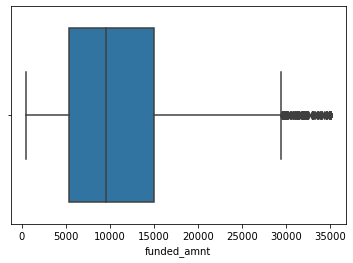

In [373]:
sns.boxplot(df1.funded_amnt)

In [374]:
df1.total_pymnt.describe()

count    39717.000000
mean     12153.596544
std       9042.040766
min          0.000000
25%       5576.930000
50%       9899.640319
75%      16534.433040
max      58563.679930
Name: total_pymnt, dtype: float64

<AxesSubplot:xlabel='total_pymnt'>

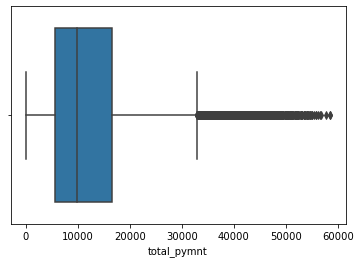

In [375]:
sns.boxplot(df1.total_pymnt)

In [376]:
df1.annual_inc.describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

<AxesSubplot:xlabel='annual_inc'>

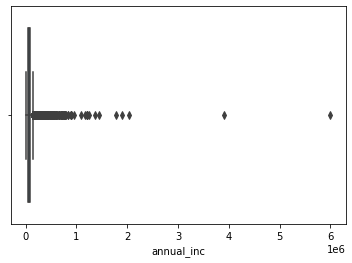

In [377]:
sns.boxplot(df1.annual_inc)
#--> Aftr plotting, it is found that there are outliers & hence, next step is to remove the outliers

<AxesSubplot:xlabel='annual_inc'>

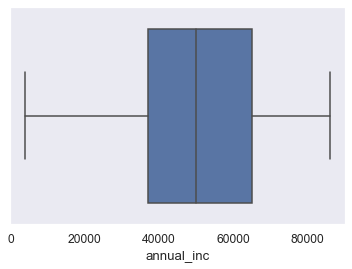

In [423]:
# Removing outliers from annual_inc 

df1 = df1[df1["annual_inc"] < df1["annual_inc"].quantile(0.99)]
sns.boxplot(df1.annual_inc)
# After removing the outliers, it is clear that the majority of the annual income lies between 50000 to 75000 for the people who have taken loan


In [381]:
df1['annual_inc'].describe()


count     38924.000000
mean      64096.802806
std       32378.165267
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       80000.000000
max      188004.000000
Name: annual_inc, dtype: float64

Text(0.5, 0, 'Interest Rate')

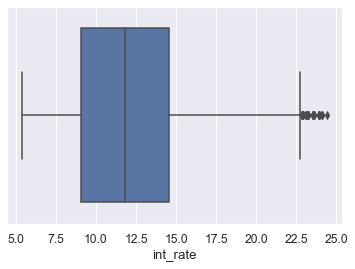

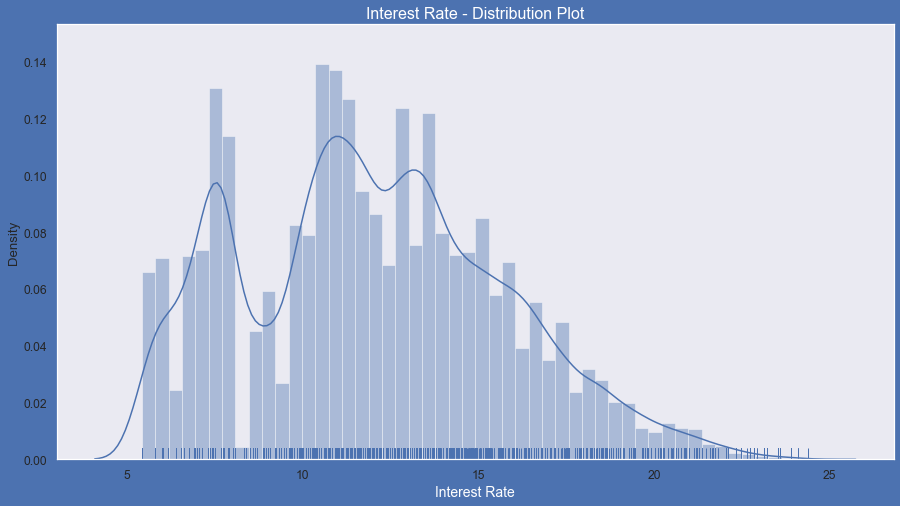

In [393]:
#Analysing int_rate field

df1['int_rate'].describe()
sns.boxplot(df1.int_rate)
# Majority of the interest rate is in teh range from 9% to 15%
plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")
ax = sns.distplot(df1['int_rate'],rug = True)
ax.set_title('Interest Rate - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Interest Rate',fontsize=14,color='w')

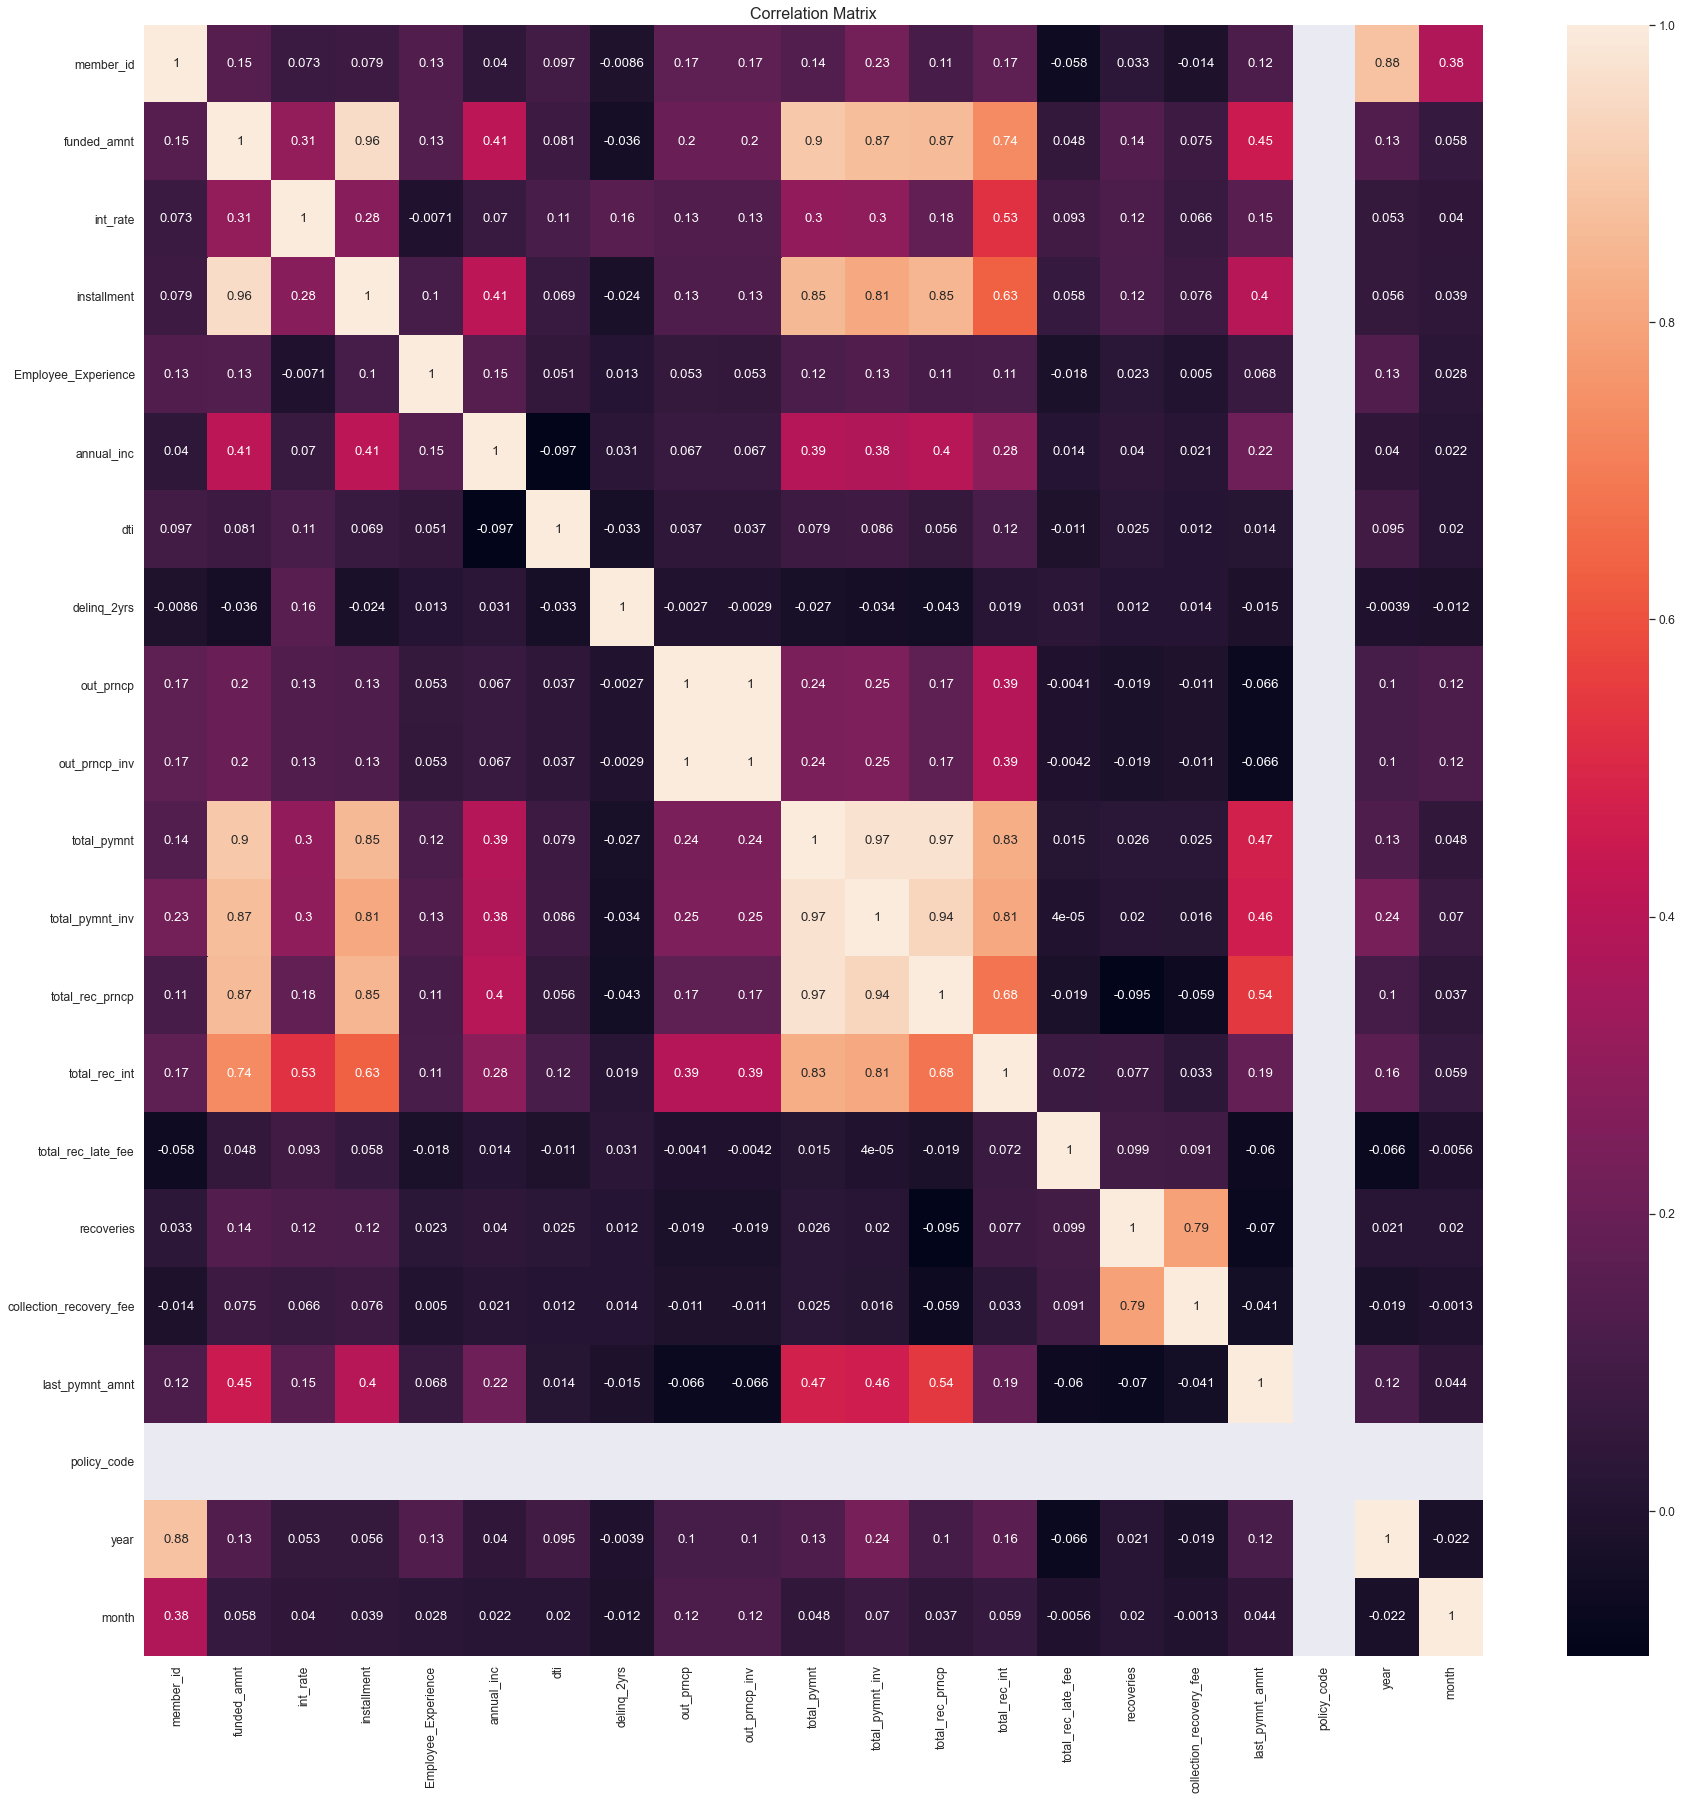

In [387]:
#df1_correlation = df1.corr()
#sns.set(font_scale=1.1)
#sns.clustermap(df1_correlation,annot=True,figsize=(12, 8),cmap="BrBG")
#plt.show()
plt.figure(figsize=(30,30))
plt.title('Correlation Matrix', fontsize=16)
d = sns.heatmap(df1.corr(), annot=True)
plt.show()

In [391]:
corr = df1.corr()
corr.style.background_gradient(cmap='coolwarm')

In [389]:
df1.policy_code.value_counts()
# Policy_code can be dropped

1    38924
Name: policy_code, dtype: int64

In [390]:
df1 = df1.drop(['policy_code'], axis='columns')
df1.shape

(38924, 32)

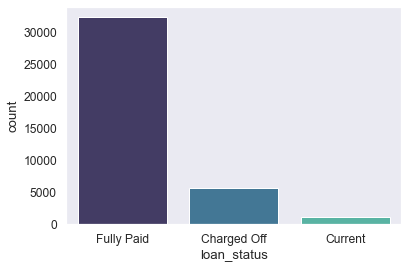

In [395]:
d = sns.countplot(x="loan_status",data=df1,palette='mako')

# Need to still find out how to mark the values on the plot

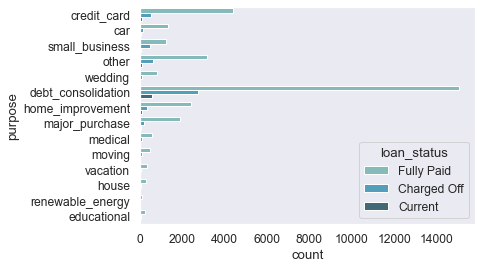

In [396]:
d = sns.countplot(y="purpose",data=df1,hue='loan_status',palette='GnBu_d')
# majority have a purpose with debt consolidation

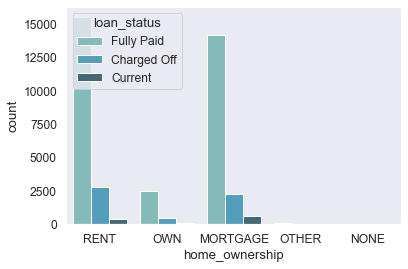

In [397]:
d = sns.countplot(x="home_ownership",data=df1,hue='loan_status',palette='GnBu_d')

# Most of the people under charged off are either living on rent or mortgaged the property

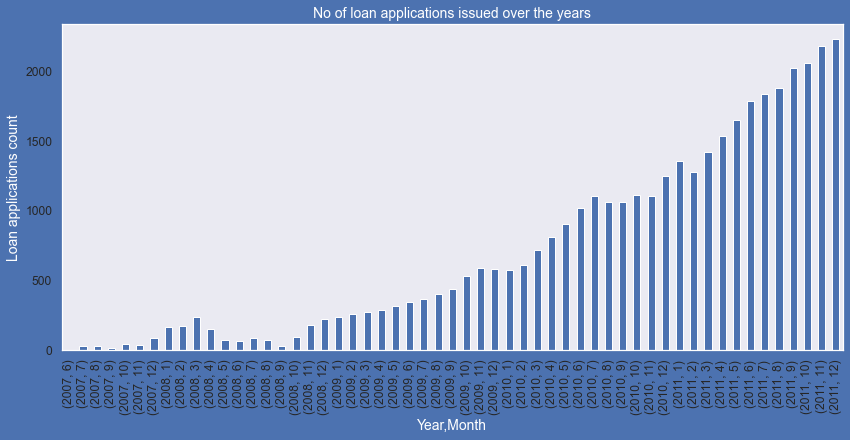

In [399]:
plt.figure(figsize=(14,6),facecolor='b')
df1.groupby(['year','month']).member_id.count().plot(kind='bar')
plt.ylabel('Loan applications count',fontsize=14,color='w')
plt.xlabel('Year,Month',fontsize=14,color = 'w')      
plt.title("No of loan applications issued over the years",fontsize=14,color='w')
plt.show()

# Trend is increasing year on year apart from 2008

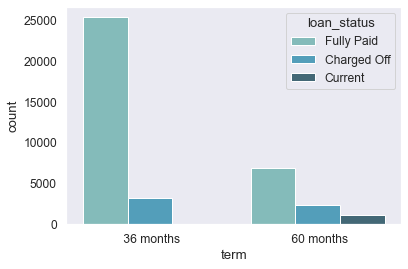

In [400]:
d = sns.countplot(x="term",data=df1,hue='loan_status',palette='GnBu_d')
# 60 months has more charged off than 36 months

In [406]:
# Derived columns
# categorise funded amounts into buckets which will help in analysis further in bivariate analysis.
df1['funded_amnt_category'] = pd.cut(df1['funded_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

# categorise annual incomes into buckets which will help in analysis further in bivariate analysis.
df1['annual_inc_category'] = pd.cut(df1['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

# categorise intrest rates into buckets which will help in analysis further in bivariate analysis.
df1['int_rate_category'] = pd.cut(df1['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-13', '12.5-16', '16 +'])

# categorise dti into buckets for bivariate analysis.
df1['dti_category'] = pd.cut(df1['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])

df1.isna().sum()
df1 = df1.drop(['annual_inc_cats','int_rate_cats','dti_cats'], axis='columns')
df1.shape

(38924, 36)

In [407]:
# Bivariate Analysis on annual income against Chargedoff_Proportion -

inc_range_vs_loan = df1.groupby(['annual_inc_category', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off'] + inc_range_vs_loan['Current'] + inc_range_vs_loan['Fully Paid'] 
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# Income range 80000+  has less chances of charged off.
# Income range 0-20000 has high chances of charged off.
# Notice that with increase in annual income charged off proportion got decreased. 

loan_status annual_inc_category  Charged Off  Current  Fully Paid  Total  \
0                       0-20000          237        9         943   1189   
1                   20000-40000         1514      170        7004   8688   
2                   40000-60000         1729      345        9534  11608   
3                   60000-80000         1024      240        6597   7861   
4                       80000 +         1045      352        8181   9578   

loan_status  Chargedoff_Proportion  
0                         0.199327  
1                         0.174263  
2                         0.148949  
3                         0.130263  
4                         0.109104

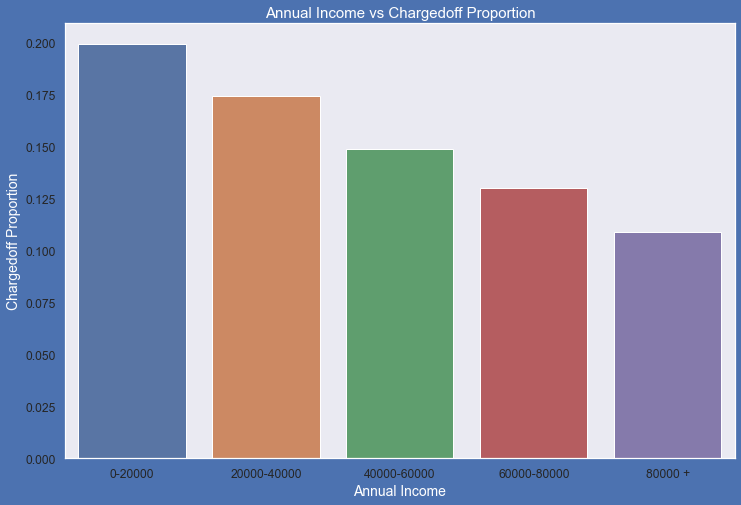

In [409]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Annual Income vs Chargedoff Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(x='annual_inc_category', y='Chargedoff_Proportion', data=inc_range_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('Annual Income',fontsize=14,color='w')
plt.show()

In [410]:
df1.isna().sum()

member_id                    0
funded_amnt                  0
term                         0
int_rate                     0
installment                  0
grade                        0
sub_grade                    0
Employee_Experience          0
home_ownership               0
annual_inc                   0
verification_status          0
issue_d                      0
loan_status                  0
purpose                      0
addr_state                   0
dti                          0
delinq_2yrs                  0
out_prncp                    0
out_prncp_inv                0
total_pymnt                  0
total_pymnt_inv              0
total_rec_prncp              0
total_rec_int                0
total_rec_late_fee           0
recoveries                   0
collection_recovery_fee      0
last_pymnt_amnt              0
last_credit_pull_d           0
application_type             0
pub_rec_bankruptcies         0
year                         0
month                        0
funded_a

In [414]:
# Bivariate Analysis on purpose of loan against Chargedoff_Proportion -

purpose_vs_loan = df1.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off'] + purpose_vs_loan['Current'] + purpose_vs_loan['Fully Paid'] 
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# loan taken with a purpose of small business have high chances of charge offs
# Number of people who have taken the loan with renewable energy are the least

loan_status             purpose  Charged Off  Current  Fully Paid    Total  \
11               small_business        469.0     73.0      1229.0   1771.0   
10             renewable_energy         18.0      1.0        79.0     98.0   
3                   educational         54.0      0.0       265.0    319.0   
7                       medical        106.0     10.0       555.0    671.0   
9                         other        617.0    124.0      3173.0   3914.0   
8                        moving         90.0      7.0       476.0    573.0   
5                         house         57.0     14.0       296.0    367.0   
2            debt_consolidation       2743.0    577.0     15036.0  18356.0   
12                     vacation         53.0      6.0       319.0    378.0   
4              home_improvement        335.0     95.0      2405.0   2835.0   
1                   credit_card        534.0    102.0      4405.0   5041.0   
0                           car        160.0     50.0      1319.0   1529.0   
6                major_purchase        219.0     37.0      1887.0   2143.0   
13                      wedding         94.0     20.0       815.0    929.0   

loan_status  Chargedoff_Proportion  
11                        0.264822  
10                        0.183673  
3                         0.169279  
7                         0.157973  
9                         0.157639  
8                         0.157068  
5                         0.155313  
2                         0.149433  
12                        0.140212  
4                         0.118166  
1                         0.105931  
0                         0.104644  
6                         0.102193  
13                        0.101184

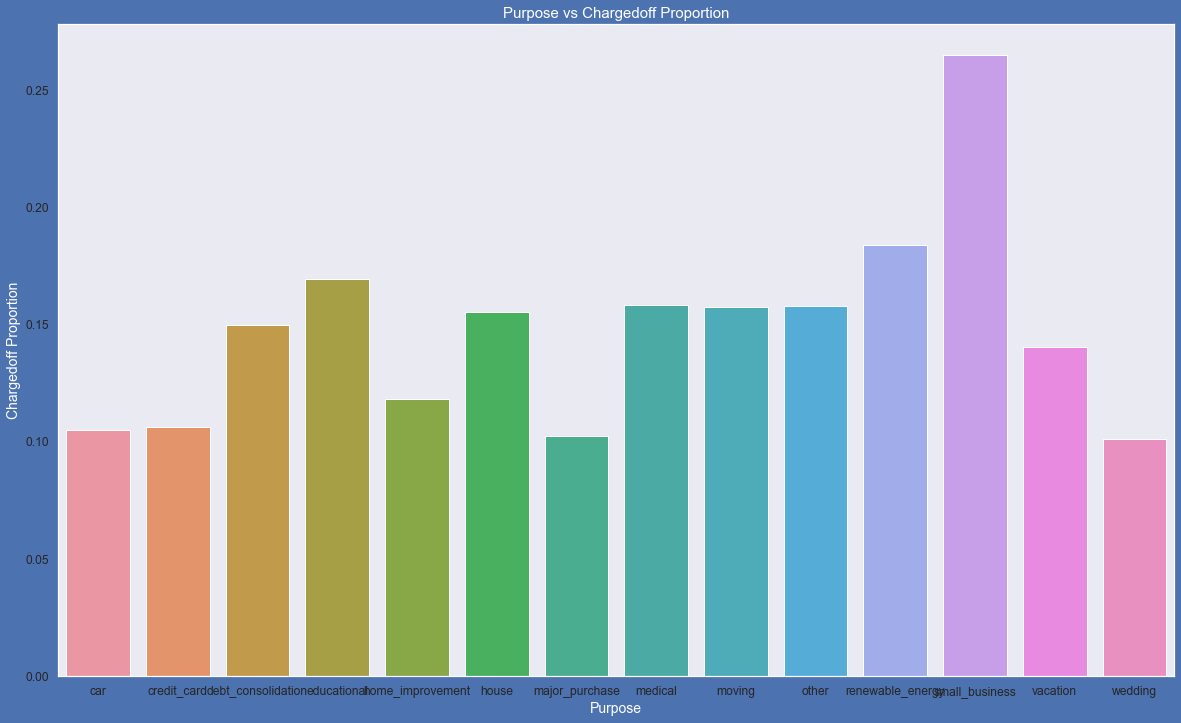

In [427]:
#plotting purpose vs loan_status
fig, ax1 = plt.subplots(figsize=(20, 12),facecolor='b')
ax1.set_title('Purpose vs Chargedoff Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(x='purpose', y='Chargedoff_Proportion', data=purpose_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('Purpose',fontsize=14,color='w')
plt.show()
# The entries with purpose as 'Small Business' have more chances of charge off's

In [426]:
# Bivariate Analysis on grade against Chargedoff_Proportion -

grade_vs_loan = df1.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] + grade_vs_loan['Current'] + grade_vs_loan['Fully Paid'] 
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# G grade has more charged offs proportionately to others
# B grade has maximum number of charged off's, however, the number of people applying loan is also very high

loan_status grade  Charged Off  Current  Fully Paid  Total  \
6               G           71        8         100    179   
5               F          228       38         405    671   
4               E          552      128        1343   2023   
3               D          919      166        3027   4112   
2               C         1150      187        5059   6396   
1               B         1216      262        7980   9458   
0               A          537       36        7425   7998   

loan_status  Chargedoff_Proportion  
6                         0.396648  
5                         0.339791  
4                         0.272862  
3                         0.223492  
2                         0.179800  
1                         0.128568  
0                         0.067142

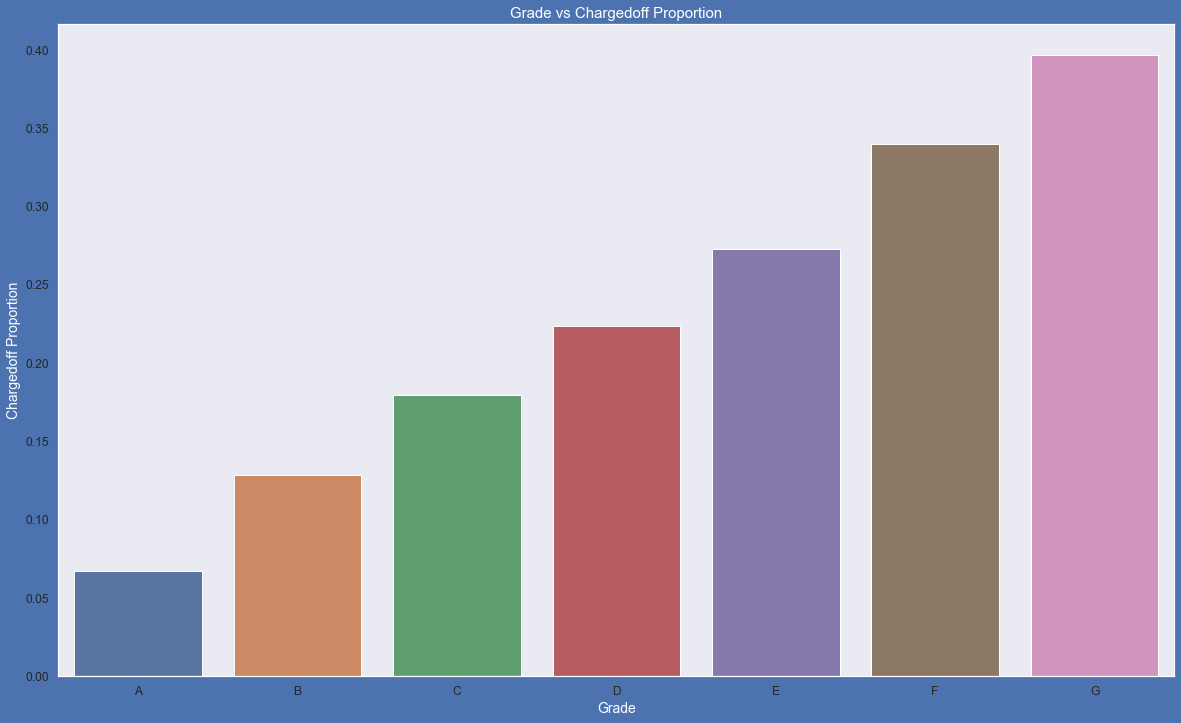

In [428]:
#plotting grade vs loan_status
fig, ax1 = plt.subplots(figsize=(20, 12),facecolor='b')
ax1.set_title('Grade vs Chargedoff Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(x='grade', y='Chargedoff_Proportion', data=grade_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('Grade',fontsize=14,color='w')
plt.show()
# The entries with purpose as 'Small Business' have more chances of charge off's

In [429]:
# Bivariate Analysis on sub-grade against Chargedoff_Proportion -

subgrade_vs_loan = df1.groupby(['sub_grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
subgrade_vs_loan['Total'] = subgrade_vs_loan['Charged Off'] + subgrade_vs_loan['Current'] + subgrade_vs_loan['Fully Paid'] 
subgrade_vs_loan['Chargedoff_Proportion'] = subgrade_vs_loan['Charged Off'] / subgrade_vs_loan['Total']
subgrade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# F5 sub-grade under F grade has more charged offs proportionately to others while G grade had highest charged offs overall


loan_status sub_grade  Charged Off  Current  Fully Paid   Total  \
29                 F5         40.0      2.0        29.0    71.0   
32                 G3         15.0      3.0        14.0    32.0   
31                 G2         19.0      0.0        28.0    47.0   
30                 G1         23.0      5.0        33.0    61.0   
33                 G4          9.0      0.0        16.0    25.0   
34                 G5          5.0      0.0         9.0    14.0   
26                 F2         52.0      6.0       101.0   159.0   
27                 F3         36.0      7.0        69.0   112.0   
28                 F4         37.0      8.0        73.0   118.0   
23                 E4         98.0     20.0       205.0   323.0   
25                 F1         63.0     15.0       133.0   211.0   
24                 E5         70.0     18.0       162.0   250.0   
21                 E2        133.0     30.0       312.0   475.0   
20                 E1        154.0     33.0       392.0   579.0   
19                 D5        162.0     26.0       458.0   646.0   
22                 E3         97.0     27.0       272.0   396.0   
18                 D4        180.0     53.0       539.0   772.0   
17                 D3        209.0     40.0       665.0   914.0   
16                 D2        231.0     47.0       751.0  1029.0   
14                 C5        176.0     23.0       728.0   927.0   
12                 C3        230.0     32.0       958.0  1220.0   
13                 C4        182.0     20.0       781.0   983.0   
15                 D1        137.0      0.0       614.0   751.0   
11                 C2        276.0     51.0      1255.0  1582.0   
10                 C1        286.0     61.0      1337.0  1684.0   
9                  B5        318.0     66.0      1778.0  2162.0   
8                  B4        276.0     48.0      1612.0  1936.0   
7                  B3        287.0     74.0      1897.0  2258.0   
6                  B2        187.0     46.0      1391.0  1624.0   
5                  B1        148.0     28.0      1302.0  1478.0   
4                  A5        191.0     24.0      1932.0  2147.0   
3                  A4        158.0     12.0      2135.0  2305.0   
2                  A3         88.0      0.0      1368.0  1456.0   
1                  A2         71.0      0.0      1127.0  1198.0   
0                  A1         29.0      0.0       863.0   892.0   

loan_status  Chargedoff_Proportion  
29                        0.563380  
32                        0.468750  
31                        0.404255  
30                        0.377049  
33                        0.360000  
34                        0.357143  
26                        0.327044  
27                        0.321429  
28                        0.313559  
23                        0.303406  
25                        0.298578  
24                        0.280000  
21                        0.280000  
20                        0.265976  
19                        0.250774  
22                        0.244949  
18                        0.233161  
17                        0.228665  
16                        0.224490  
14                        0.189860  
12                        0.188525  
13                        0.185148  
15                        0.182423  
11                        0.174463  
10                        0.169834  
9                         0.147086  
8                         0.142562  
7                         0.127104  
6                         0.115148  
5                         0.100135  
4                         0.088961  
3                         0.068547  
2                         0.060440  
1                         0.059265  
0                         0.032511

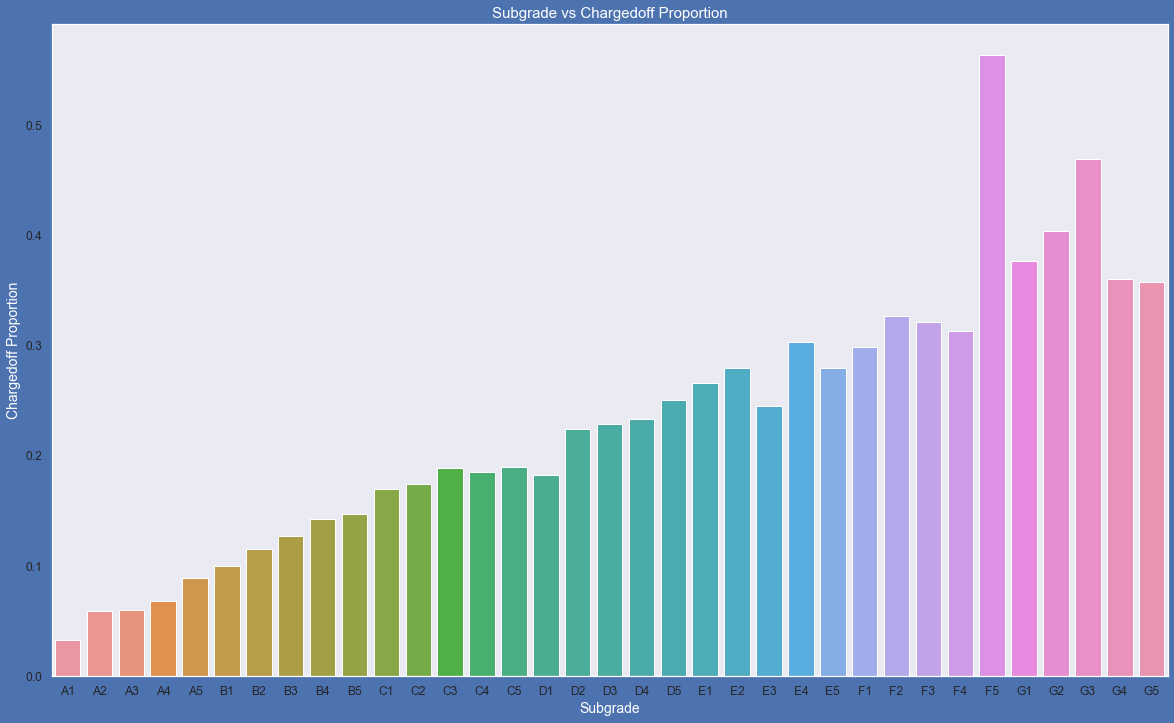

In [431]:
#plotting sub-grade vs loan_status
fig, ax1 = plt.subplots(figsize=(20, 12),facecolor='b')
ax1.set_title('Subgrade vs Chargedoff Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(x='sub_grade', y='Chargedoff_Proportion', data=subgrade_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('Subgrade',fontsize=14,color='w')
plt.show()
# Clearly grade F5 is the winner

In [432]:
# Bivariate Analysis on funded_amnt_category against Chargedoff_Proportion -

fundedamount_vs_loan = df1.groupby(['funded_amnt_category', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
fundedamount_vs_loan['Total'] = fundedamount_vs_loan['Charged Off'] + fundedamount_vs_loan['Current'] + fundedamount_vs_loan['Fully Paid'] 
fundedamount_vs_loan['Chargedoff_Proportion'] = fundedamount_vs_loan['Charged Off'] / fundedamount_vs_loan['Total']
fundedamount_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations: The charged-offs are more for increasing amount of loan

loan_status funded_amnt_category  Charged Off  Current  Fully Paid  Total  \
4                        28000 +           99       44         238    381   
3                    21000-28000          270      104         927   1301   
2                    14000-21000          926      263        3812   5001   
1                     7000-14000         1594      265        9317  11176   
0                         0-7000         1784      149       11045  12978   

loan_status  Chargedoff_Proportion  
4                         0.259843  
3                         0.207533  
2                         0.185163  
1                         0.142627  
0                         0.137463

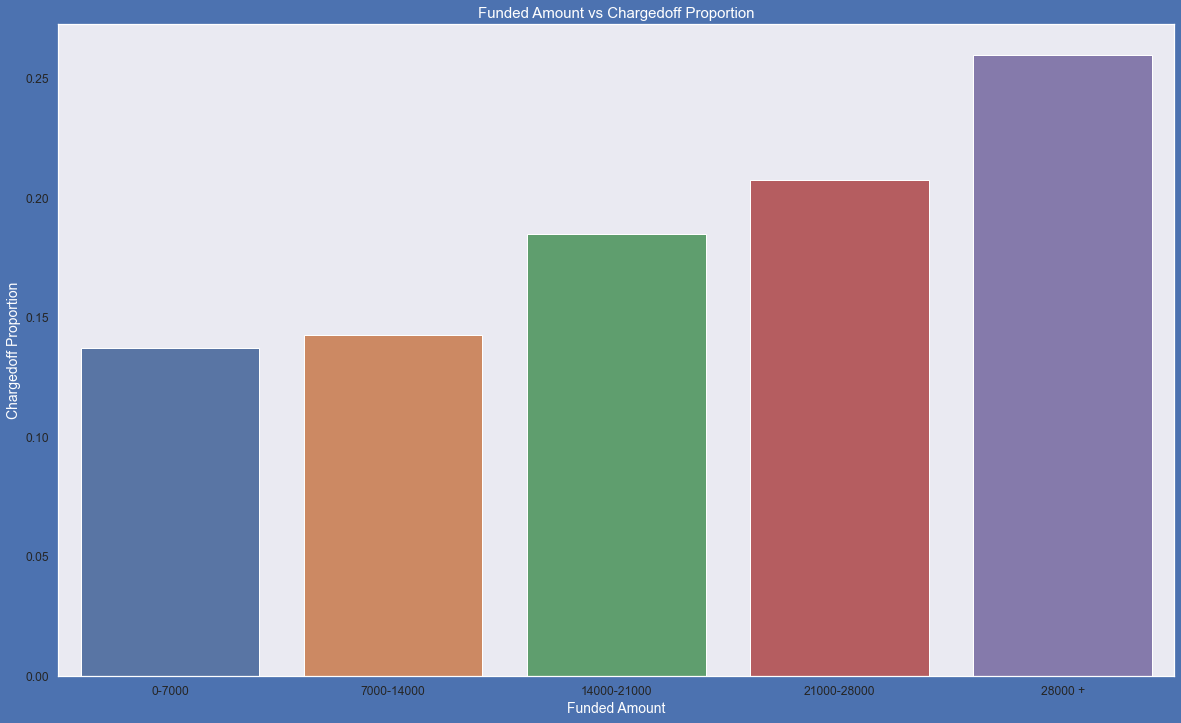

In [436]:
#plotting funded_amnt_category vs loan_status
fig, ax1 = plt.subplots(figsize=(20, 12),facecolor='b')
ax1.set_title('Funded Amount vs Chargedoff Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(x='funded_amnt_category', y='Chargedoff_Proportion', data=fundedamount_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('Funded Amount',fontsize=14,color='w')
plt.show()
# Clearly grade F5 is the winner

In [437]:
# Bivariate Analysis on interest rate against Chargedoff_Proportion -

interest_rate_vs_loan = df1.groupby(['int_rate_category', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_rate_vs_loan['Total'] = interest_rate_vs_loan['Charged Off'] + interest_rate_vs_loan['Current'] + interest_rate_vs_loan['Fully Paid'] 
interest_rate_vs_loan['Chargedoff_Proportion'] = interest_rate_vs_loan['Charged Off'] / interest_rate_vs_loan['Total']
interest_rate_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# More the interest rate, more are the charge-offs


loan_status int_rate_category  Charged Off  Current  Fully Paid  Total  \
3                        16 +          998      264        2358   3620   
2                     12.5-16         1693      236        7359   9288   
1                       10-13         1051      203        6308   7562   
0                        0-10          727       68        9050   9845   

loan_status  Chargedoff_Proportion  
3                         0.275691  
2                         0.182278  
1                         0.138984  
0                         0.073845

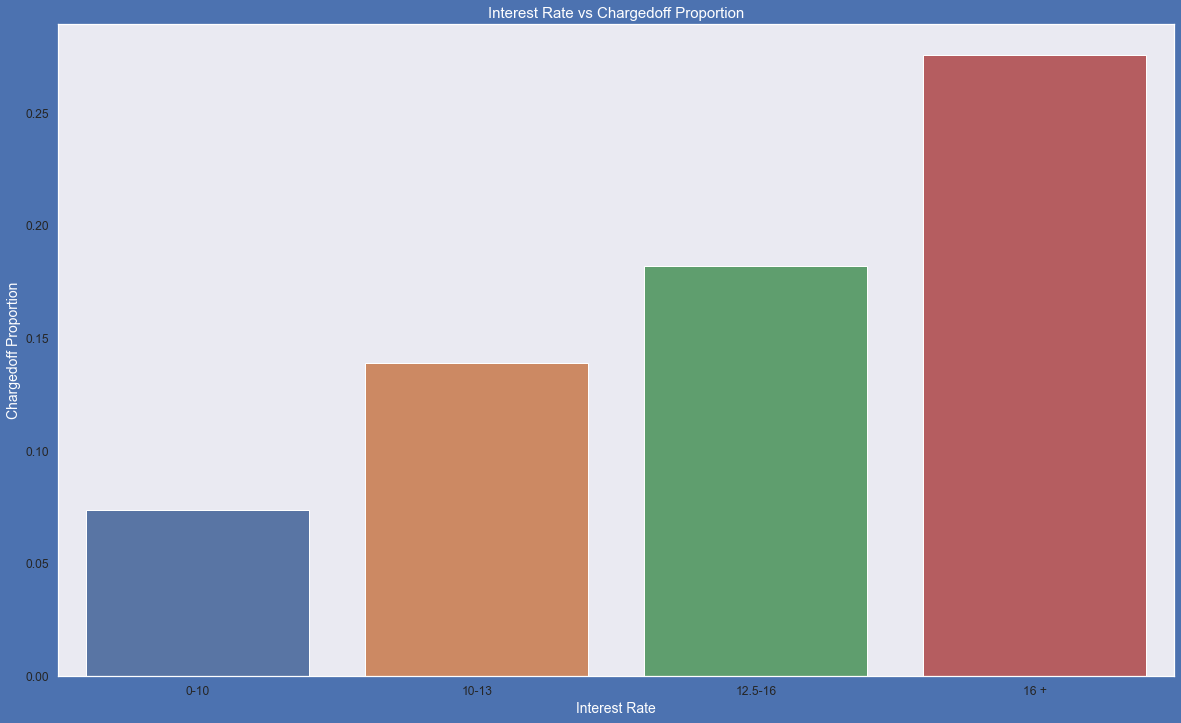

In [438]:
#plotting interest rate vs loan_status
fig, ax1 = plt.subplots(figsize=(20, 12),facecolor='b')
ax1.set_title('Interest Rate vs Chargedoff Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(x='int_rate_category', y='Chargedoff_Proportion', data=interest_rate_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('Interest Rate',fontsize=14,color='w')
plt.show()
# More the interest rate, more are the charge-offs

In [439]:
# Bivariate Analysis on sub-grade against Chargedoff_Proportion -

dti_vs_loan = df1.groupby(['dti_category', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
dti_vs_loan['Total'] = dti_vs_loan['Charged Off'] + dti_vs_loan['Current'] + dti_vs_loan['Fully Paid'] 
dti_vs_loan['Chargedoff_Proportion'] = dti_vs_loan['Charged Off'] / dti_vs_loan['Total']
dti_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# F5 sub-grade under F grade has more charged offs proportionately to others while G grade had highest charged offs overall

loan_status dti_category  Charged Off  Current  Fully Paid  Total  \
4                    25+          997      202        4639   5838   
3                  15-20         1164      209        5963   7336   
2                  10-15         1149      182        6226   7557   
1                  05-10          789      123        4829   5741   
0                    0-5          469       57        3082   3608   

loan_status  Chargedoff_Proportion  
4                         0.170778  
3                         0.158670  
2                         0.152044  
1                         0.137433  
0                         0.129989

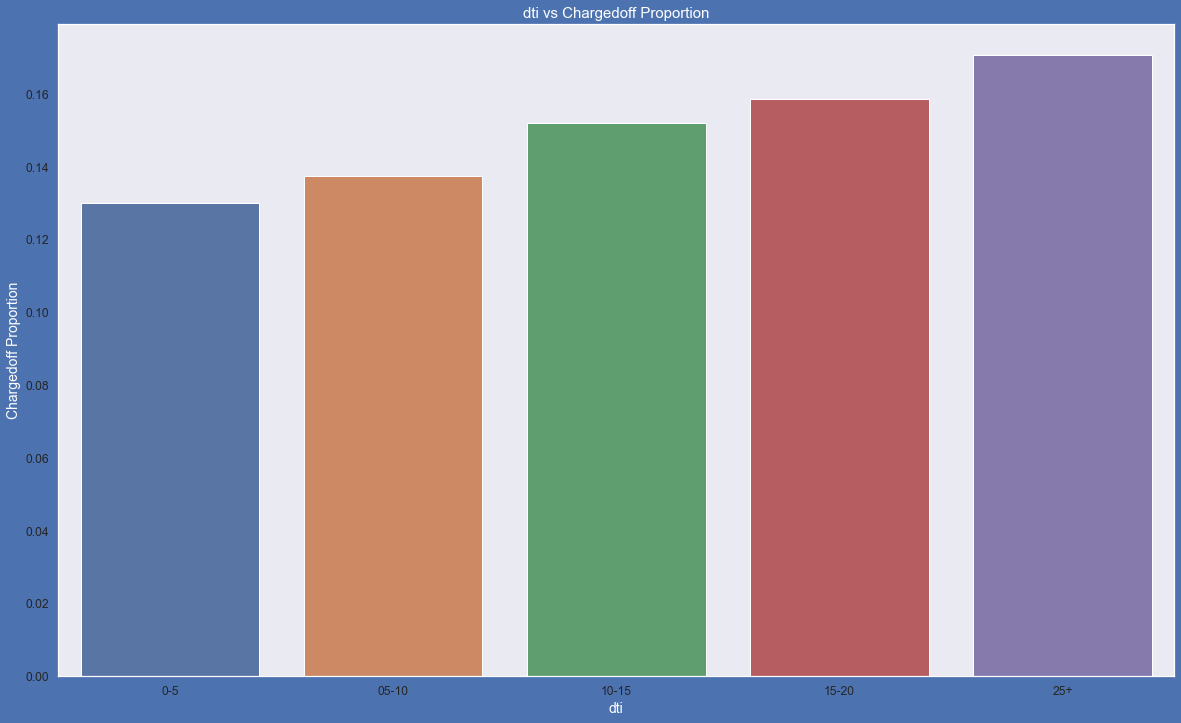

In [441]:
#plotting dti vs loan_status
fig, ax1 = plt.subplots(figsize=(20, 12),facecolor='b')
ax1.set_title('dti vs Chargedoff Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(x='dti_category', y='Chargedoff_Proportion', data=dti_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('dti',fontsize=14,color='w')
plt.show()
# Clearly grade F5 is the winner